# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Shape of training data: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of test data: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
Total number of classes: 100
Dimensions of each image: (32, 32, 3)


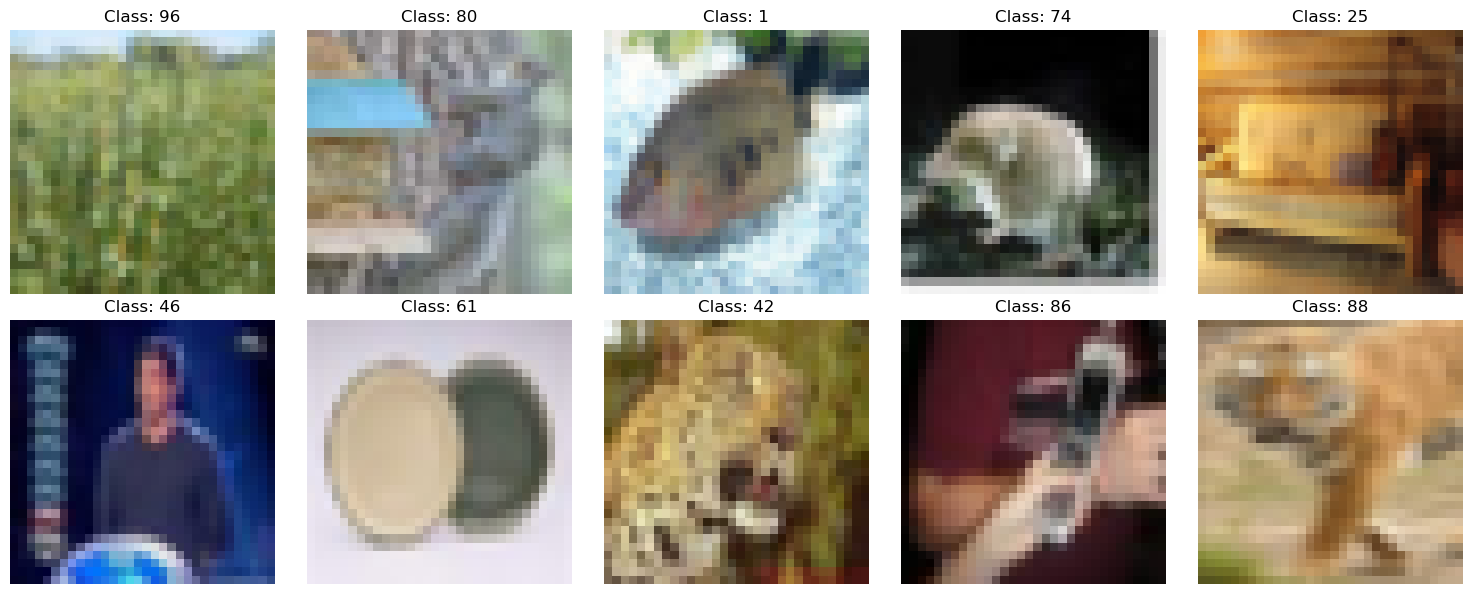

In [3]:
import matplotlib.pyplot as plt
import numpy as np


print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test data: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

num_classes = np.unique(y_train).shape[0]
print(f"Total number of classes: {num_classes}")

image_shape = x_train.shape[1:]
print(f"Dimensions of each image: {image_shape}")

def plot_random_images(images, labels, num_examples=10):
    indices = np.random.choice(len(images), num_examples, replace=False)
    selected_images = images[indices]
    selected_labels = labels[indices]

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(selected_images[i])
        ax.set_title(f"Class: {selected_labels[i][0]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_random_images(x_train, y_train, num_classes)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of validation data: {x_val.shape}")
print(f"Shape of validation labels: {y_val.shape}")

print(f"Shape of test data: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

Shape of training data: (40000, 32, 32, 3)
Shape of training labels: (40000, 100)
Shape of validation data: (10000, 32, 32, 3)
Shape of validation labels: (10000, 100)
Shape of test data: (10000, 32, 32, 3)
Shape of test labels: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy which is suitable for classification tasks like this scenario.
- <b>Optimizer:</b> SGD with momentum is chosen for its simplicity and effectiveness

In [6]:
from keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
    I started with 30 epochs to see how the model learns and to check if it's improving. This gives enough time to see patterns without taking too long. If the model gets better, we can train it more. If it stops getting better, we can stop early to save time.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:

epochs = 30
batch_size = 32

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))



Epoch 1/30
1250/1250 [==============================] - 38s 30ms/step - loss: 4.5895 - accuracy: 0.0151 - val_loss: 4.5444 - val_accuracy: 0.0224
Epoch 2/30
1250/1250 [==============================] - 48s 38ms/step - loss: 4.2881 - accuracy: 0.0474 - val_loss: 4.0970 - val_accuracy: 0.0699
Epoch 3/30
1250/1250 [==============================] - 48s 38ms/step - loss: 4.0031 - accuracy: 0.0868 - val_loss: 3.8902 - val_accuracy: 0.1036
Epoch 4/30
1250/1250 [==============================] - 47s 37ms/step - loss: 3.7672 - accuracy: 0.1272 - val_loss: 3.6758 - val_accuracy: 0.1373
Epoch 5/30
1250/1250 [==============================] - 49s 39ms/step - loss: 3.5738 - accuracy: 0.1630 - val_loss: 3.5258 - val_accuracy: 0.1727
Epoch 6/30
1250/1250 [==============================] - 48s 38ms/step - loss: 3.4014 - accuracy: 0.1924 - val_loss: 3.3881 - val_accuracy: 0.1994
Epoch 7/30
1250/1250 [==============================] - 48s 38ms/step - loss: 3.2518 - accuracy: 0.2218 - val_loss: 3.2256 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.3273000121116638
- <b>Other metric:</b> f1 score
- <b>Reason for selection:</b> shows the result of the precision and recall which simbolize the false negatives and false positives
- <b>Value of metric:</b> 0.325925231529023
- <b>Interpretation of metric value:</b> model's precision and recall are low

In [14]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f" Accuracy: {test_accuracy}")

y_pred = model.predict(x_test)

y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
f1_score = report["weighted avg"]["f1-score"]
recall = report['weighted avg']['recall']
precision = report['weighted avg']['precision']
print(f" F1 Score: {f1_score}")
print(f"recall: {recall}")
print(f" precision: {precision}")


print(f"Classification Report:\n{classification_report(y_true_classes, y_pred_classes)}")


313/313 [==============================] - 1s 4ms/step - loss: 3.9486 - accuracy: 0.3273
 Accuracy: 0.3273000121116638
313/313 [==============================] - 1s 4ms/step
 F1 Score: 0.325925231529023
recall: 0.3273
 precision: 0.350431239090195
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       100
           1       0.35      0.53      0.42       100
           2       0.23      0.31      0.26       100
           3       0.28      0.19      0.23       100
           4       0.17      0.11      0.13       100
           5       0.24      0.27      0.25       100
           6       0.38      0.26      0.31       100
           7       0.29      0.56      0.39       100
           8       0.34      0.33      0.33       100
           9       0.55      0.40      0.46       100
          10       0.16      0.24      0.19       100
          11       0.20      0.17      0.19       100
          12       0.35   

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

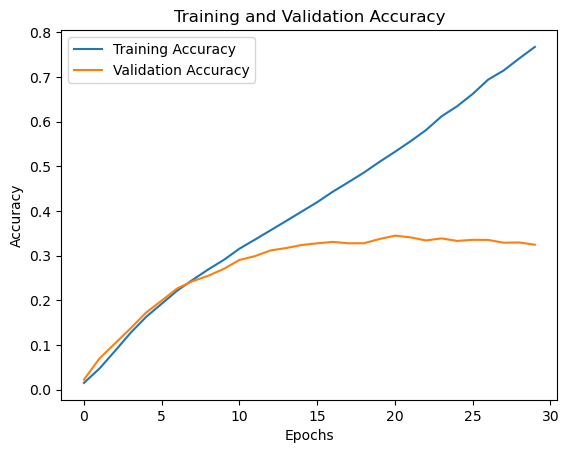

313/313 [==============================] - 1s 4ms/step


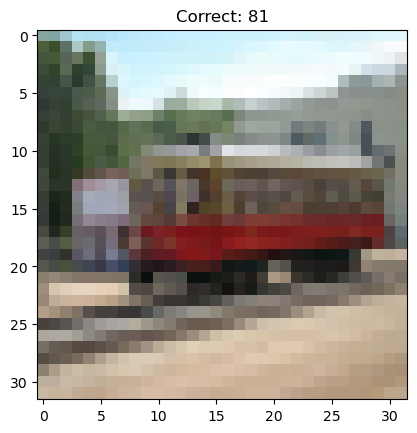

 probabilities of the correctly classified image:
[2.64729824e-16 4.51438921e-11 6.28360905e-12 1.81914423e-12
 1.17861843e-09 1.35584480e-12 4.29551041e-14 9.33568153e-11
 2.79223741e-07 1.94768057e-13 1.76163218e-12 6.83543730e-14
 8.64394494e-08 9.25127733e-06 4.59467466e-14 3.62464017e-11
 1.79686918e-10 2.26032665e-10 9.56387543e-14 2.63304266e-12
 1.48366576e-13 1.03767914e-14 3.48400203e-14 1.18248282e-12
 2.10955673e-15 3.18054762e-12 2.45958254e-10 1.03732378e-09
 5.36831567e-15 3.82435106e-09 6.70424111e-13 1.06681157e-13
 9.86590115e-11 1.14189058e-08 6.90249344e-13 6.35180182e-15
 1.71653027e-15 2.41780555e-07 3.91056011e-15 6.11783437e-14
 3.13721691e-15 4.91505947e-10 2.04633114e-14 1.41043824e-17
 1.00373822e-12 1.80039046e-12 1.70166821e-12 9.07301040e-11
 8.80919117e-07 1.77119222e-10 1.45195013e-13 7.01979233e-14
 7.84526198e-13 2.65837816e-17 8.17678173e-14 1.11889263e-12
 8.46215798e-14 2.96827829e-13 1.60704483e-03 7.28681004e-11
 1.94319170e-12 1.26514450e-15 1.54

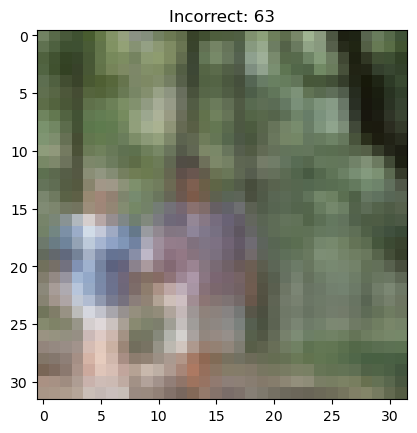

 probabilities of the incorrectly classified image:
[6.8678002e-10 4.0392186e-07 1.0198081e-06 1.5311938e-04 5.1042304e-04
 1.5237558e-06 1.1916088e-05 9.4590672e-07 2.6180241e-03 6.4205888e-06
 3.3650622e-07 4.2925699e-06 6.8947833e-05 1.7084169e-05 8.8935303e-06
 3.0323435e-04 7.8729778e-07 3.5101621e-08 1.1311197e-03 2.3947593e-06
 3.0882255e-09 2.5215896e-04 7.6712109e-07 1.8920490e-06 1.3014822e-11
 6.1801484e-07 1.8118679e-07 1.4472989e-04 2.1804459e-07 5.4552056e-05
 2.9125187e-05 9.2935272e-02 9.2208735e-05 4.1878864e-02 1.5394827e-06
 5.3142150e-05 8.1933189e-07 4.5602055e-06 7.7328784e-03 1.8774905e-07
 3.7953129e-07 2.6998721e-06 4.1362431e-02 8.0842212e-05 4.1201268e-04
 1.2059582e-04 2.0487010e-05 9.5660098e-06 5.3786823e-07 1.5201285e-10
 2.2350093e-03 4.1097092e-06 1.4193942e-05 6.1139628e-11 1.4162612e-07
 6.6309323e-04 1.4096403e-06 5.2156917e-08 1.2714390e-09 1.7517127e-04
 1.2580783e-11 1.0154289e-07 2.1004107e-09 5.4624736e-01 6.7100786e-03
 2.0139655e-01 4.4856507e

In [18]:
# Your code here
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

import numpy as np

predictions = model.predict(x_test)

correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

correct_image_index = correct_indices[1]
incorrect_image_index = incorrect_indices[1]

plt.imshow(x_test[correct_image_index])
plt.title(f'Correct: {np.argmax(predictions[correct_image_index])}')
plt.show()

print(" probabilities of the correctly classified image:")
print(predictions[correct_image_index])

plt.imshow(x_test[incorrect_image_index])
plt.title(f'Incorrect: {np.argmax(predictions[incorrect_image_index])}')
plt.show()

print(" probabilities of the incorrectly classified image:")
print(predictions[incorrect_image_index])


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [20]:
# Your code here
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_35 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                      

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


num_epochs = 30  
batch_size = 32

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=num_epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, lr_reduction]
)

print(history.history.keys())

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/30
1250/1250 [==============================] - 45s 35ms/step - loss: 4.3596 - accuracy: 0.0691 - val_loss: 3.6030 - val_accuracy: 0.1474 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 62s 50ms/step - loss: 3.7090 - accuracy: 0.1246 - val_loss: 3.5009 - val_accuracy: 0.1625 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 54s 43ms/step - loss: 3.4755 - accuracy: 0.1622 - val_loss: 3.0635 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 52s 42ms/step - loss: 3.3049 - accuracy: 0.1956 - val_loss: 3.4538 - val_accuracy: 0.1909 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 123s 98ms/step - loss: 3.1844 - accuracy: 0.2169 - val_loss: 3.0601 - val_accuracy: 0.2461 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 129s 103ms/step - loss: 3.0797 - accuracy: 0.2361 - val_loss: 2.8078 - val_accuracy: 0.2762 - lr: 0.0010
Epoch 7/30
1250/1250 [=====================

313/313 [==============================] - 3s 8ms/step - loss: 1.9019 - accuracy: 0.4796
 Accuracy: 0.4796000123023987
313/313 [==============================] - 3s 7ms/step
 F1 Score: 0.468422585018068
recall: 0.4796
 precision: 0.4961297877833984
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.66      0.52      0.58       100
           2       0.40      0.30      0.34       100
           3       0.34      0.10      0.16       100
           4       0.24      0.23      0.23       100
           5       0.46      0.37      0.41       100
           6       0.62      0.63      0.62       100
           7       0.40      0.55      0.46       100
           8       0.57      0.58      0.57       100
           9       0.77      0.50      0.61       100
          10       0.49      0.24      0.32       100
          11       0.38      0.36      0.37       100
          12       0.59  

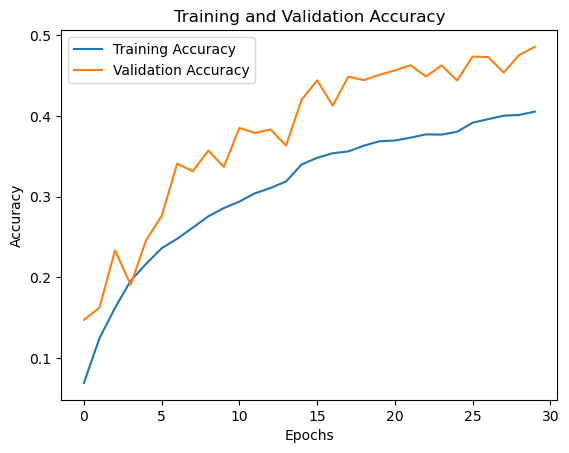

313/313 [==============================] - 2s 8ms/step


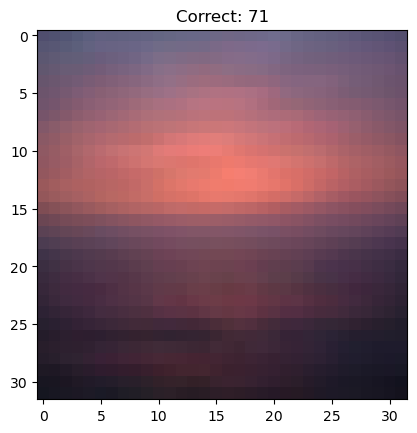

 probabilities of the correctly classified image:
[6.56436096e-05 5.73981779e-05 1.50438950e-06 8.31187572e-06
 1.51575850e-05 5.83321562e-05 8.80610344e-07 8.68501900e-07
 2.56220886e-07 9.14916427e-07 4.93224470e-05 2.63881316e-06
 1.33838403e-04 4.74745866e-06 4.15470936e-07 2.39922292e-06
 3.23425775e-06 1.04349965e-05 1.45488111e-05 1.38665482e-05
 5.15672991e-06 6.36700724e-06 3.43801662e-06 2.46447086e-01
 8.05322725e-06 2.00689072e-04 3.18667617e-06 3.78164696e-05
 5.42307935e-05 3.02795138e-06 7.11509638e-05 9.17911893e-06
 2.99890726e-05 4.40970412e-04 2.17387674e-06 9.26239011e-07
 1.57021702e-06 4.60938418e-06 9.87893486e-07 9.58599267e-05
 3.23780550e-05 1.98958631e-07 2.15326827e-06 3.06871743e-06
 9.14761586e-06 6.33667651e-06 1.19264851e-05 2.10455873e-05
 7.47660422e-08 2.00681817e-02 2.21004666e-06 5.77955007e-06
 5.17308763e-06 9.38654011e-06 1.10281035e-05 2.84692469e-05
 2.31927174e-06 8.12488452e-06 1.82291035e-06 9.37723598e-06
 1.69611424e-01 1.25661027e-05 2.71

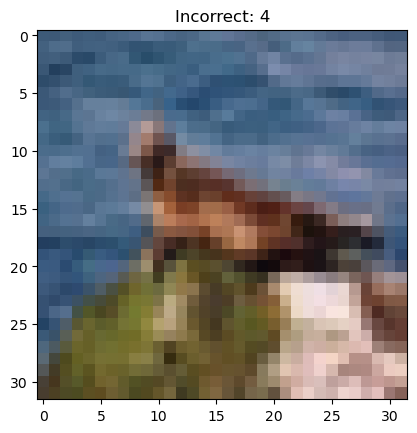

 probabilities of the incorrectly classified image:
[5.1881648e-06 2.8362236e-04 5.9670181e-04 1.6082611e-02 1.7189144e-01
 2.4186633e-05 8.8585829e-03 3.0510407e-02 4.1726558e-04 5.8001991e-05
 8.0071186e-05 7.9193135e-04 2.0563903e-03 1.6238338e-04 3.2338651e-03
 1.9829804e-03 3.4909357e-05 4.4393211e-05 1.5755611e-02 9.8964281e-04
 5.3544351e-05 3.0234708e-03 1.4595312e-04 7.9001504e-05 1.9690439e-02
 4.0827890e-05 7.0130795e-02 3.9285477e-02 7.0054055e-05 4.6569058e-03
 7.2905056e-02 5.5612199e-04 2.7657917e-03 2.2041646e-04 1.0258966e-02
 8.6477748e-04 7.5705684e-05 2.2044455e-04 2.5302912e-03 9.8290213e-04
 2.2526541e-04 1.4166904e-04 5.4669017e-03 3.2033299e-03 2.2700686e-02
 2.2335812e-02 1.0958026e-03 1.4076906e-05 4.6214715e-04 3.4825082e-04
 2.3155152e-03 3.5978321e-03 9.9408389e-06 1.6215071e-06 6.0752471e-05
 1.2973413e-01 5.1982782e-04 3.7358597e-05 6.4105931e-05 2.9593060e-04
 1.2965595e-05 1.1984333e-05 1.2565247e-05 2.6135333e-03 2.4888732e-03
 4.6533646e-04 3.4745499e

In [22]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f" Accuracy: {test_accuracy}")

y_pred = model.predict(x_test)

y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
f1_score = report["weighted avg"]["f1-score"]
recall = report['weighted avg']['recall']
precision = report['weighted avg']['precision']
print(f" F1 Score: {f1_score}")
print(f"recall: {recall}")
print(f" precision: {precision}")


print(f"Classification Report:\n{classification_report(y_true_classes, y_pred_classes)}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

import numpy as np

predictions = model.predict(x_test)

correct_indices = np.where(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))[0]
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

correct_image_index = correct_indices[1]
incorrect_image_index = incorrect_indices[1]

plt.imshow(x_test[correct_image_index])
plt.title(f'Correct: {np.argmax(predictions[correct_image_index])}')
plt.show()

print(" probabilities of the correctly classified image:")
print(predictions[correct_image_index])

plt.imshow(x_test[incorrect_image_index])
plt.title(f'Incorrect: {np.argmax(predictions[incorrect_image_index])}')
plt.show()

print(" probabilities of the incorrectly classified image:")
print(predictions[incorrect_image_index])



### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The model’s accuracy improved from 32% to 47.9% after adding normalization and data augmentation, showing that these techniques made a positive impact.
The performance improved because the image generator makes more varied versions of the images which creates more example for the model helping it learn better and handle different kinds of images. 
This improvement is promising, but there’s still potential for better results. I might try running more epochs to give the model more time to learn. Additionally, tweaking other settings like learning rate or adding dropout could help. Also applying different data augmentation techniques could also boost performance as well as using pre-trained models.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.